In [9]:
import pandas as pd
import geopandas as gpd
from scipy.stats import spearmanr

In [10]:
unweighted = gpd.read_file(r"C:\Users\b8008458\OneDrive - Newcastle University\2021 to 2022\Dissertation\Github\BarrierRemoval\Study Areas\Pembrokeshire\Barriers\PembrokeBarriersMetrics.gpkg")
weighted = gpd.read_file(r"C:\Users\b8008458\OneDrive - Newcastle University\2021 to 2022\Dissertation\Github\BarrierRemoval\Study Areas\Pembrokeshire\Barriers\PembrokeBarriersMetricsWeighted.gpkg")

In [11]:
unweighted['unweighted_rank'] = unweighted['Overall_Score'].rank(ascending=False)
weighted['weighted_rank'] = weighted['Overall_Score'].rank(ascending=False)

In [12]:
join = unweighted.merge(weighted, on = 'globalid', how ='left', suffixes=('','_y'))
join.drop(join.filter(regex='_y$').columns, axis=1, inplace=True)

In [13]:
rho, p = spearmanr(join['unweighted_rank'], join['weighted_rank'])

In [14]:
print(rho)

0.1085822664770033


In [15]:
print(p)

0.5223634131504384


<AxesSubplot:xlabel='unweighted_rank', ylabel='weighted_rank'>

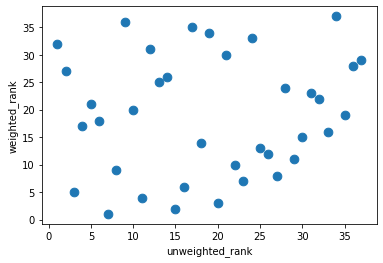

In [16]:
join.plot.scatter(x = 'unweighted_rank', y = 'weighted_rank', s = 75)